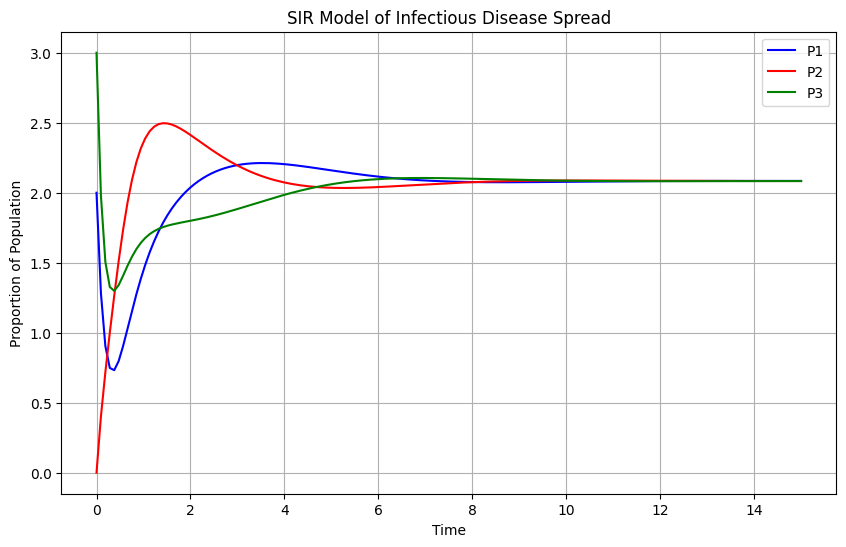

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 定义常微分方程组
def deriv(y, t, p):
    S1, S2, S3, P1, P2, P3 = y
    dS1dt = -S1 + p[3] / (1 + P3 ** p[1]) + p[0]
    dS2dt = -S2 + p[3] / (1 + P1 ** p[1]) + p[0]
    dS3dt = -S3 + p[3] / (1 + P2 ** p[1]) + p[0]
    dP1dt = p[2] * (S1 - P1)
    dP2dt = p[2] * (S2 - P2)
    dP3dt = p[2] * (S3 - P3)

    return dS1dt, dS2dt, dS3dt, dP1dt, dP2dt, dP3dt

# 初始条件
S10 = 0
S20 = 1
S30 = 0
P10 = 2
P20 = 0
P30 = 3
y0 = S10, S20, S30, P10, P20, P30

# 时间点
t = np.linspace(0, 15, 160)

# 定义参数
params = (1, 1.75, 5, 5)

# 解常微分方程
solution = odeint(deriv, y0, t, args=(params,))
P1, P2, P3 = solution.T[3], solution.T[4], solution.T[5]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(t, P1, label='P1', color='blue')
plt.plot(t, P2, label='P2', color='red')
plt.plot(t, P3, label='P3', color='green')
plt.title('SIR Model of Infectious Disease Spread')
plt.xlabel('Time')
plt.ylabel('Proportion of Population')
plt.legend()
plt.grid()
plt.show()